# Lending Club Case Study
## Problem Statement
Identify risky loan applicants to minimize credit loss and improve risk management strategies.

## Dataset Overview
The dataset contains information about loans with details such as loan amount, interest rate, purpose, and loan status.

- Total rows: 39717
- Total columns: 111

### Key Variable
- **loan_status**: Status of the loan (fully paid, current, charged-off)

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import PercentFormatter

#### Load Dataset

In [5]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(39717, 111)

## Data Cleaning and Preprocessing
- Handling missing values.
- Removing irrelevant columns.
- Converting data types where necessary (e.g., percentages to numeric).

### Data Cleaning

In [9]:
# Missing value
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
# Finding columns having more than 30 percent missing values
missing_values = np.round(df.isna().sum()/len(df)*100, 2)
remove_columns = missing_values[missing_values > 30]

In [11]:
# Remove such columns
remove_columns_index = list(remove_columns[remove_columns > 0.3].index)
df.drop(labels=remove_columns_index, axis=1, inplace=True)
len(remove_columns_index)

58

### Data Preprocessing

#### Updating Interest Rate from Object to Float

In [14]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

## Exploratory Data Analysis (EDA)

## 1. Annual Income

### Univariate Analysis

#### Check distribution of Annual Income

In [19]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

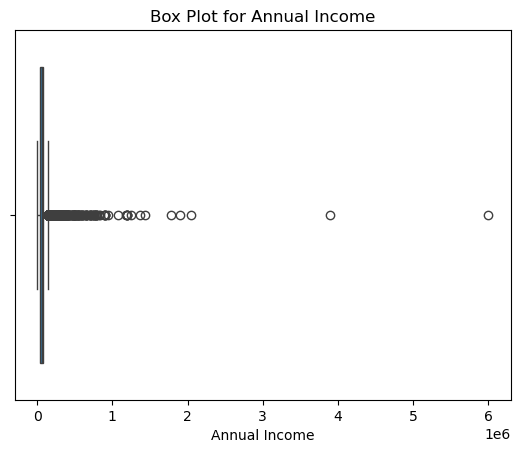

In [20]:
# Plotting Box Plot
sns.boxplot(x=df['annual_inc'])
plt.xlabel('Annual Income')
plt.title('Box Plot for Annual Income')
plt.show()

In [21]:
# There are outliers, so removing outliers above 150000
df_ann_inc = df[(df['annual_inc'] < 150000)]

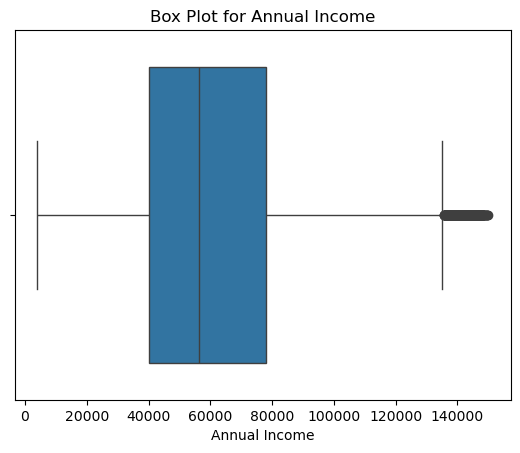

In [22]:
# Plotting Box Plot
sns.boxplot(x=df_ann_inc['annual_inc'])
plt.xlabel('Annual Income')
plt.title('Box Plot for Annual Income')
plt.show()

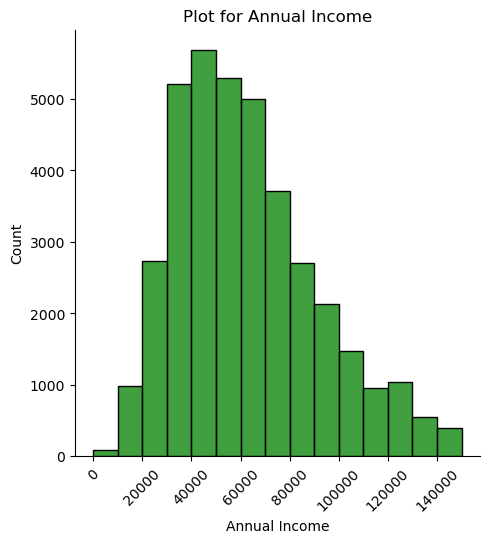

In [23]:
# Plotting Distribution Plot
sns.displot(x=df_ann_inc['annual_inc'], bins=range(0,160000,10000), color='g')
plt.xlabel('Annual Income')
plt.xticks(rotation=45)
plt.title('Plot for Annual Income')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Annual Income values are between 40000 and 150000

### Bivariate analysis with 'loan_status'

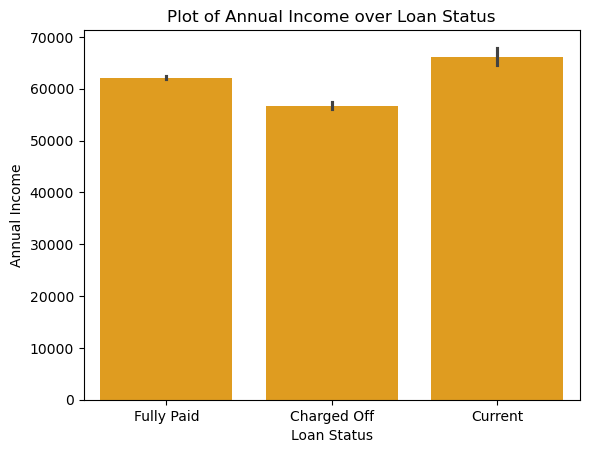

In [26]:
# Plotting Bar Plot
sns.barplot(df_ann_inc, x='loan_status', y='annual_inc', estimator='mean', color='orange')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Plot of Annual Income over Loan Status')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Annual Income does not have any impact on Loan Default`

## 2. Address State

### Univariate Analysis

In [30]:
df['addr_state'].value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [31]:
se_addr_state_val_cnt = df['addr_state'].value_counts()

In [32]:
# Removing Addr States having count less than or equal to 100
se_addr_state_val_cnt_gt_100 = se_addr_state_val_cnt[se_addr_state_val_cnt.values > 100]

In [33]:
# Filtering data
df_addr_state_cnt_gt_100 = df[df['addr_state'].isin(se_addr_state_val_cnt_gt_100.index)]

### Bivariate Analysis with 'loan_status'

In [35]:
# Finding Loan Default Percentage for each Addr State
se_addr_state = df_addr_state_cnt_gt_100[df_addr_state_cnt_gt_100['loan_status'] == 'Charged Off']['addr_state'].value_counts()/df_addr_state_cnt_gt_100['addr_state'].value_counts()*100

In [36]:
# Selecting Top 10 Addr States with Highest Default Percentage
se_addr_state_top_10 = se_addr_state.sort_values(ascending=False)[0:10]

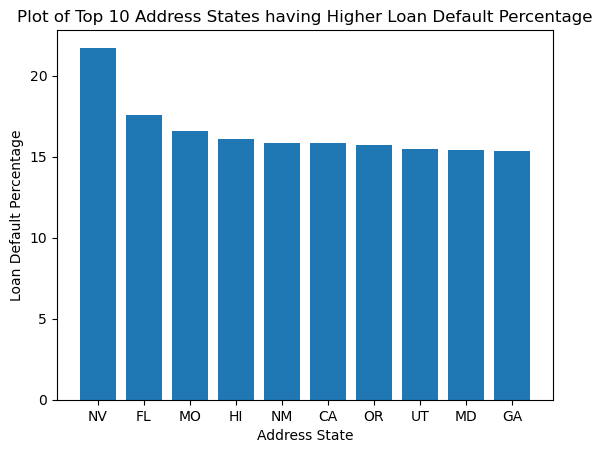

In [37]:
# Plotting Bar Plot
plt.bar(se_addr_state_top_10.index, se_addr_state_top_10.values)
plt.xlabel('Address State')
plt.ylabel('Loan Default Percentage')
plt.title('Plot of Top 10 Address States having Higher Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Applicant Address State does not have any impact on Loan Default`

## 3. Debt To Income Ratio (dti)

### Univariate Analysis

In [41]:
df['dti'].dtypes

dtype('float64')

In [42]:
df['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

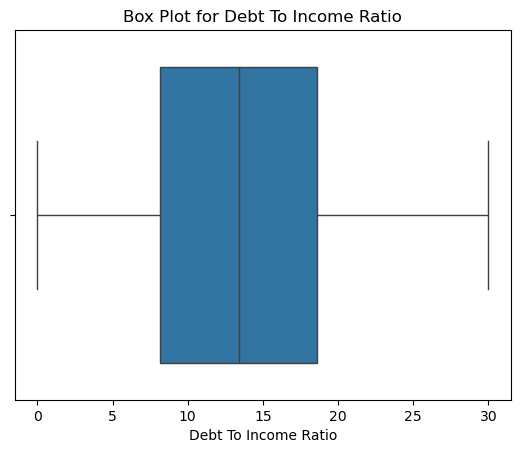

In [43]:
# Plotting Box Plot
sns.boxplot(x=df['dti'])
plt.xlabel('Debt To Income Ratio')
plt.title('Box Plot for Debt To Income Ratio')
plt.show()

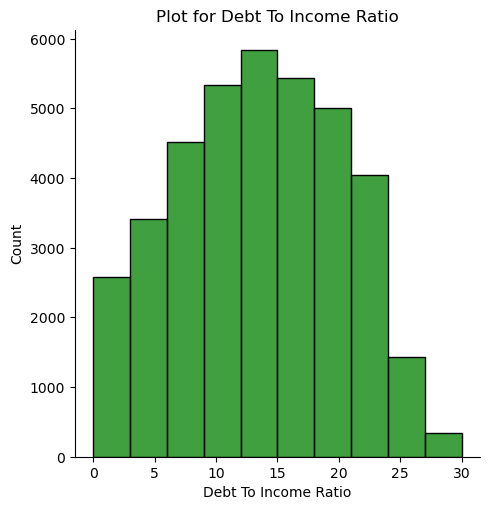

In [44]:
# Plotting Distribution Plot
sns.displot(x=df_ann_inc['dti'], bins=10, color='g')
plt.xlabel('Debt To Income Ratio')
plt.title('Plot for Debt To Income Ratio')
plt.show()

### Bivariate analysis with 'loan_status'

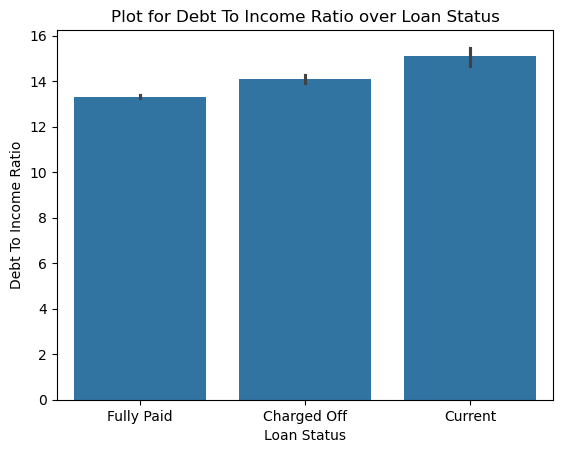

In [46]:
# Plotting Bar Plot
sns.barplot(df_ann_inc, x='loan_status', y='dti', estimator='mean')
plt.xlabel('Loan Status')
plt.ylabel('Debt To Income Ratio')
plt.title('Plot for Debt To Income Ratio over Loan Status')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Debt To Income Ratio does not have any impact on Loan Default`

## 4. Employment Length

### Univariate Analysis

In [50]:
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

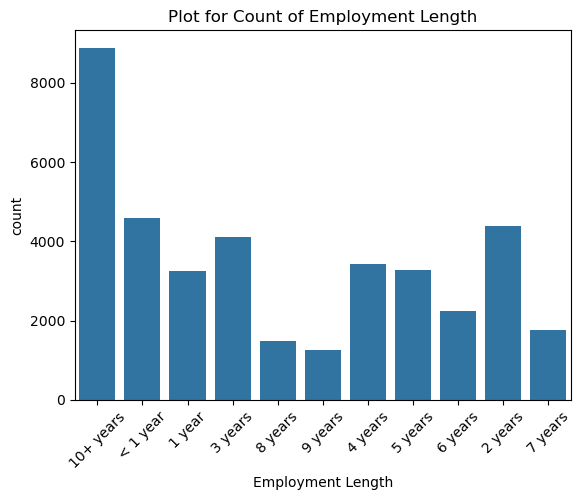

In [51]:
# Plotting Count Plot
sns.countplot(x = df['emp_length'])
plt.xlabel('Employment Length')
plt.xticks(rotation=45)
plt.title('Plot for Count of Employment Length')
plt.show()

<font color = red><b>Conclusion</b></font> - Higher number of applicants are having 10 plus years of experience

### Bivariate analysis with 'loan_status'

In [54]:
# Finding Loan Default Percentage for each Employment Length
se_emp_length = round(df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()/df['emp_length'].value_counts()*100, 2)

In [55]:
# Sorting based on Default Percentage
se_emp_length.sort_values(ascending=False, inplace=True)

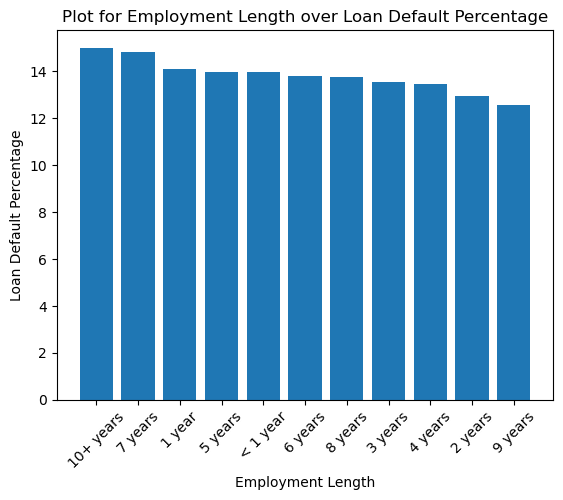

In [56]:
# Plotting Bar Plot
plt.bar(se_emp_length.index, se_emp_length.values)
plt.xlabel('Employment Length')
plt.xticks(rotation=45)
plt.ylabel('Loan Default Percentage')
plt.title('Plot for Employment Length over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Employment Length does not have any impact on Loan Default`

## 5. Funded Amount

### Univariate Analysis

In [60]:
df['funded_amnt'].value_counts()

funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64

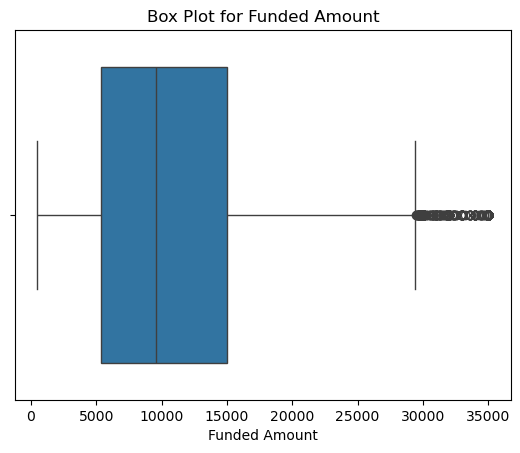

In [61]:
# Plotting Box Plot
sns.boxplot(x=df['funded_amnt'])
plt.xlabel('Funded Amount')
plt.title('Box Plot for Funded Amount')
plt.show()

In [62]:
# Removing Outliers
df_funded_amnt = df[df['funded_amnt'] < 30000]

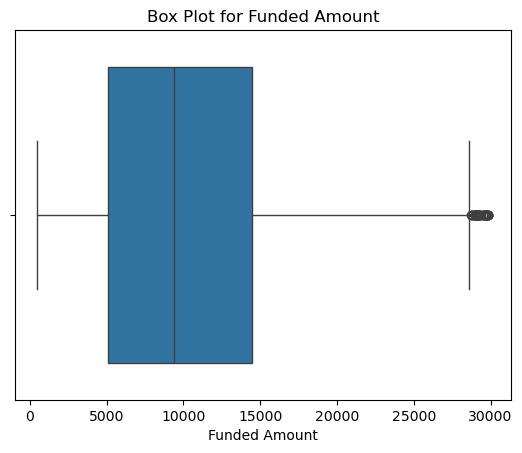

In [63]:
# Plotting Box Plot
sns.boxplot(x=df_funded_amnt['funded_amnt'])
plt.xlabel('Funded Amount')
plt.title('Box Plot for Funded Amount')
plt.show()

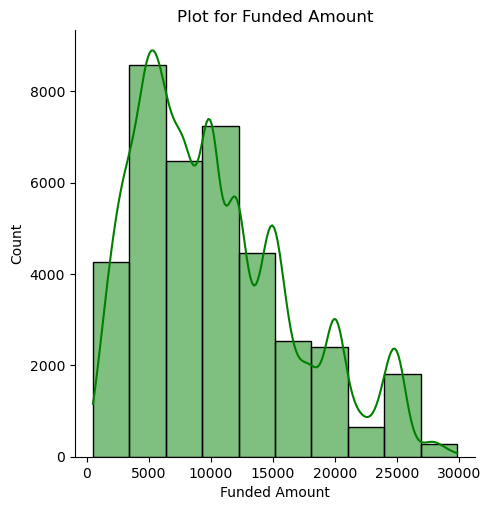

In [64]:
# Plotting Distribution Plot
sns.displot(x=df_funded_amnt['funded_amnt'], bins=10, kde=True, color='g')
plt.xlabel('Funded Amount')
plt.title('Plot for Funded Amount')
plt.show()

### Bivariate analysis with 'loan_status'

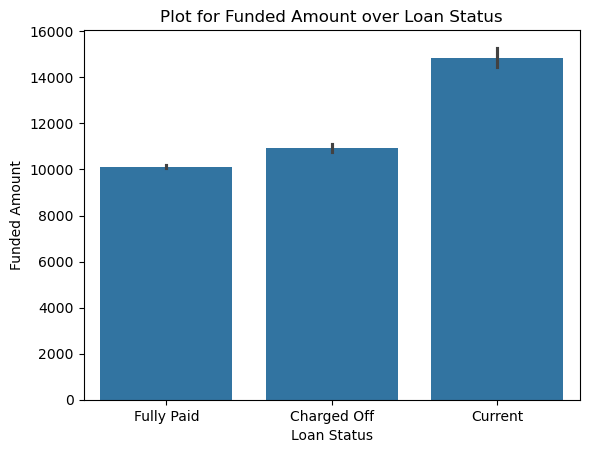

In [66]:
# Plotting Bar Plot
sns.barplot(df_funded_amnt, x='loan_status', y='funded_amnt', estimator='mean')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount')
plt.title('Plot for Funded Amount over Loan Status')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Funded Amount does not have any impact on Loan Default`

## 6. Funded Amount Investors

### Univariate Analysis

In [70]:
df['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

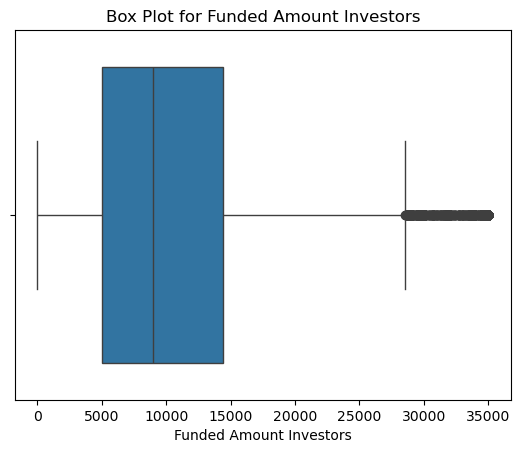

In [71]:
# Plotting Box Plot
sns.boxplot(x=df['funded_amnt_inv'])
plt.xlabel('Funded Amount Investors')
plt.title('Box Plot for Funded Amount Investors')
plt.show()

In [72]:
# Removing Outliers
df_funded_amnt_inv = df[df['funded_amnt_inv'] < 28000]

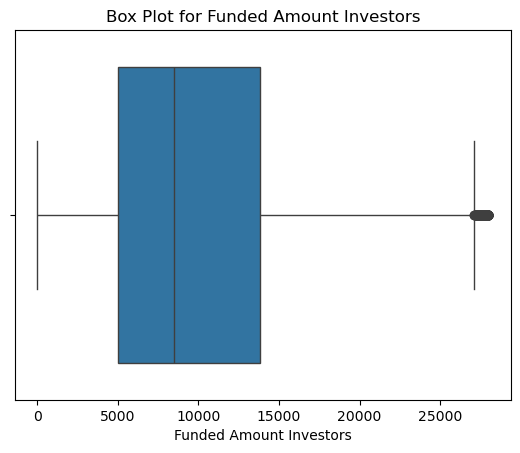

In [73]:
# Plotting Box Plot
sns.boxplot(x=df_funded_amnt_inv['funded_amnt_inv'])
plt.xlabel('Funded Amount Investors')
plt.title('Box Plot for Funded Amount Investors')
plt.show()

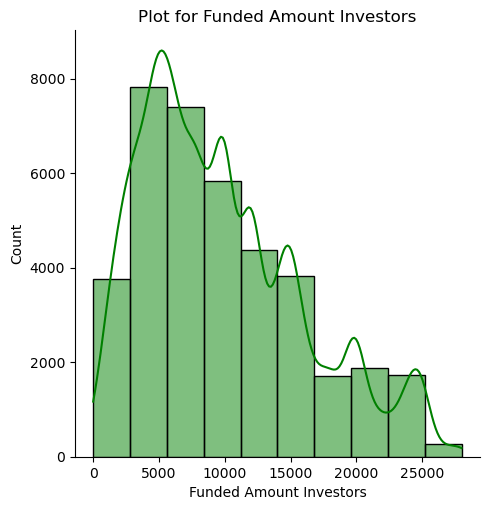

In [74]:
# Plotting Distribution Plot
sns.displot(x=df_funded_amnt_inv['funded_amnt_inv'], bins=10, kde=True, color='g')
plt.xlabel('Funded Amount Investors')
plt.title('Plot for Funded Amount Investors')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of values are between 2500 and 15000

### Bivariate analysis with 'loan_status'

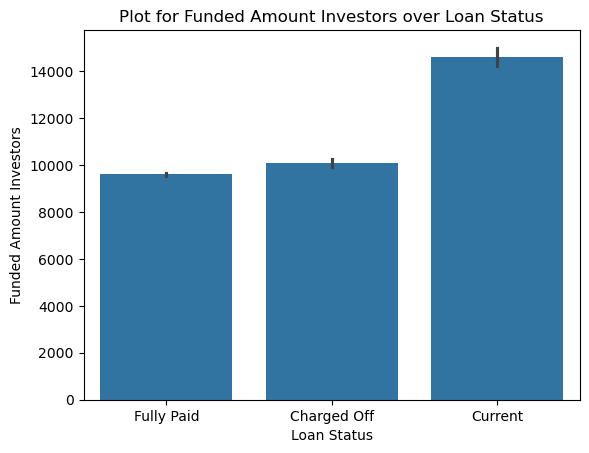

In [77]:
# Plotting Bar Plot
sns.barplot(df_funded_amnt_inv, x='loan_status', y='funded_amnt_inv', estimator='mean')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount Investors')
plt.title('Plot for Funded Amount Investors over Loan Status')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Funded Amount Investors does not have any impact on Loan Default`

## 7. Grade

### Univariate Analysis

In [81]:
df['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

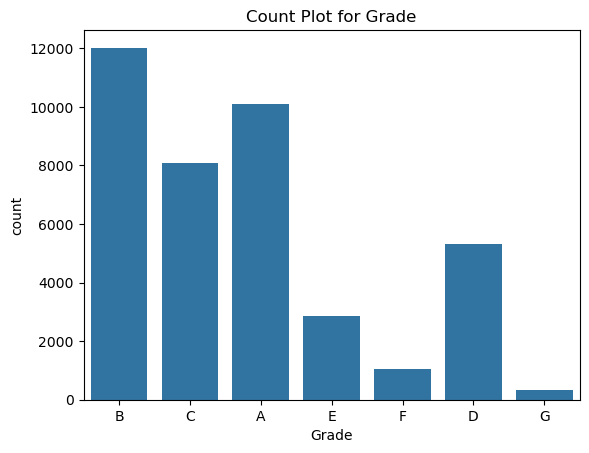

In [82]:
# Plotting Count Plot
sns.countplot(x = df['grade'])
plt.xlabel('Grade')
plt.title('Count Plot for Grade')
plt.show()

### Bivariate analysis with 'loan_status'

In [84]:
# Finding Loan Default Percentage for each Grade
se_grade = round(df[df['loan_status'] == 'Charged Off']['grade'].value_counts()/df['grade'].value_counts()*100, 2)

In [85]:
# Sorting columns on Default Percentage
se_grade.sort_values(ascending=False, inplace=True)

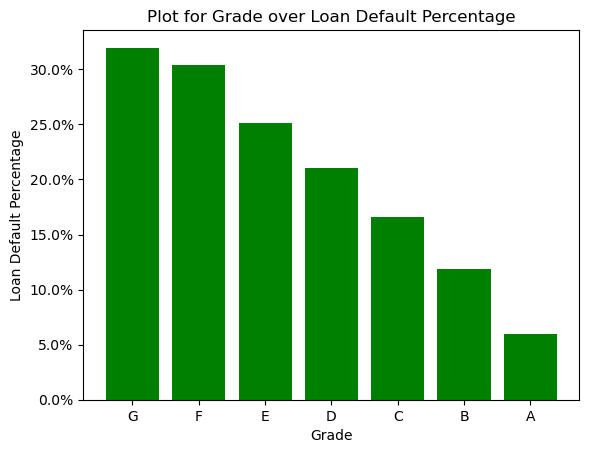

In [86]:
# Plotting Bar Plot
plt.bar(se_grade.index, se_grade.values, color='green')
plt.xlabel('Grade')
plt.ylabel('Loan Default Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Plot for Grade over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Lower Grade participant will more likely to Default on Loan than Higher Grade Participant`

## 8. Home Ownership

### Univariate Analysis

In [90]:
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

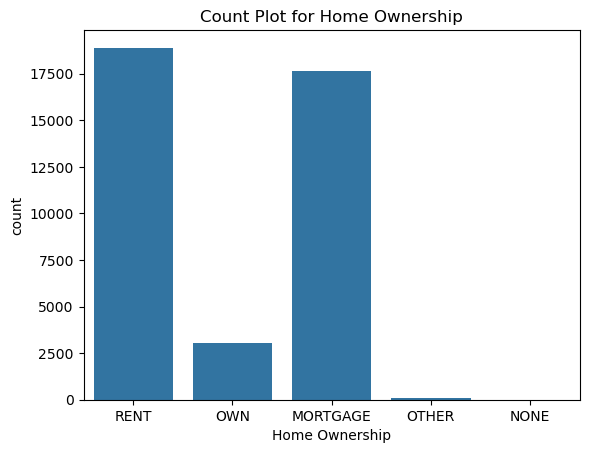

In [91]:
# Plotting Count Plot
sns.countplot(x = df['home_ownership'])
plt.xlabel('Home Ownership')
plt.title('Count Plot for Home Ownership')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Loan applicants living in Rented Home or have their Home on Mortgage

In [93]:
# Removing Home Ownership as 'NONE' records
df_filtered = df[df['home_ownership'].isin(['RENT', 'OWN', 'MORTGAGE', 'OTHER'])]

### Bivariate analysis with 'loan_status'

In [95]:
# Finding Loan Default Percentage for each Home Ownership
se_home_ownership_charged_off = round(df_filtered[df_filtered['loan_status'] == 'Charged Off']['home_ownership'].value_counts()/df_filtered['home_ownership'].value_counts()*100, 2)

In [96]:
# Sorting columns on Default Percentage
se_home_ownership_charged_off.sort_values(ascending=False, inplace=True)

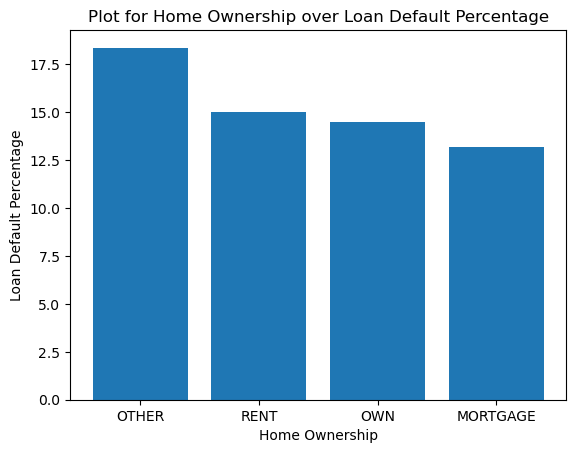

In [97]:
# Plotting Bar Plot
plt.bar(se_home_ownership_charged_off.index, se_home_ownership_charged_off.values)
plt.xlabel('Home Ownership')
plt.ylabel('Loan Default Percentage')
plt.title('Plot for Home Ownership over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Home Ownership does not have any impact on Loan Default`

## 9. Inquiries in past 6 months

### Univariate Analysis

In [101]:
df['inq_last_6mths'].value_counts()

inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: count, dtype: int64

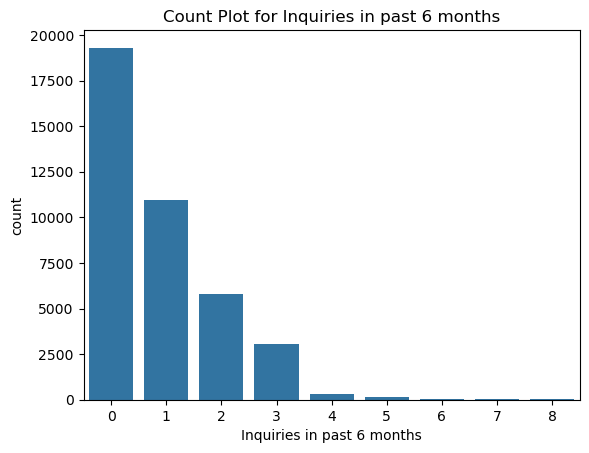

In [102]:
# Plotting Count Plot
sns.countplot(x = df['inq_last_6mths'])
plt.xlabel('Inquiries in past 6 months')
plt.title('Count Plot for Inquiries in past 6 months')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Applicants did not have inquiries in past 6 months

### Bivariate analysis with 'loan_status'

In [105]:
# Finding Loan Default Percentage for each count of Inquiries in past 6 months
se_inq_last_6mths_charged_off = round(df[df['loan_status'] == 'Charged Off']['inq_last_6mths'].value_counts()/df['inq_last_6mths'].value_counts()*100, 2)

In [106]:
# Sorting columns on Default Percentage
se_inq_last_6mths_charged_off.sort_values(ascending=False, inplace=True)

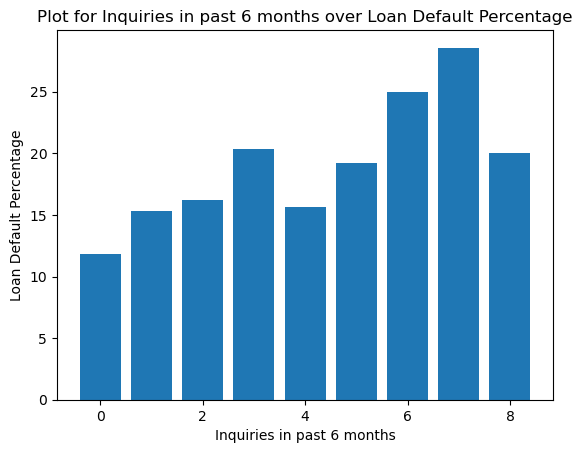

In [107]:
# Plotting Bar Plot
plt.bar(se_inq_last_6mths_charged_off.index, se_inq_last_6mths_charged_off.values)
plt.xlabel('Inquiries in past 6 months')
plt.ylabel('Loan Default Percentage')
plt.title('Plot for Inquiries in past 6 months over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Applicant having more Inquiries in past 6 months is slightly more likely to Default on Loan than those with lesser enquiries`

## 10. Interest Rate

### Univariate Analysis

In [111]:
df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

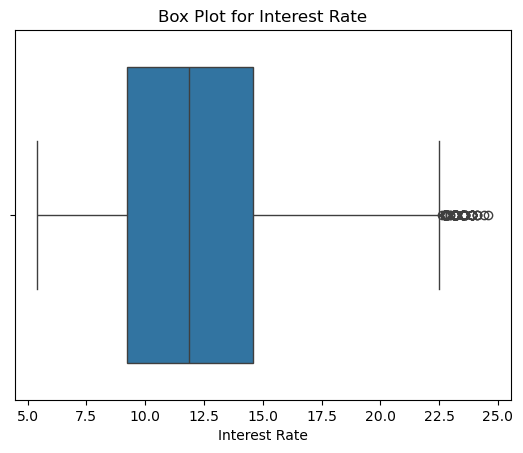

In [112]:
# Plotting Box Plot
sns.boxplot(x=df['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Box Plot for Interest Rate')
plt.show()

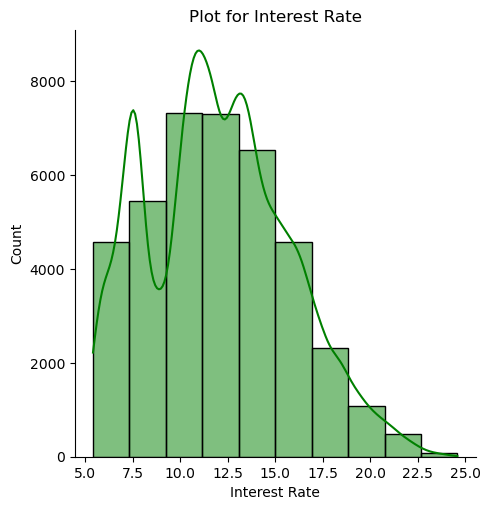

In [113]:
# Plotting Distribution Plot
sns.displot(x=df['int_rate'], bins=10, kde=True, color='g')
plt.xlabel('Interest Rate')
plt.title('Plot for Interest Rate')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Loan Interest Rate is between 9 to 15 percent

### Bivariate analysis with 'loan_status'

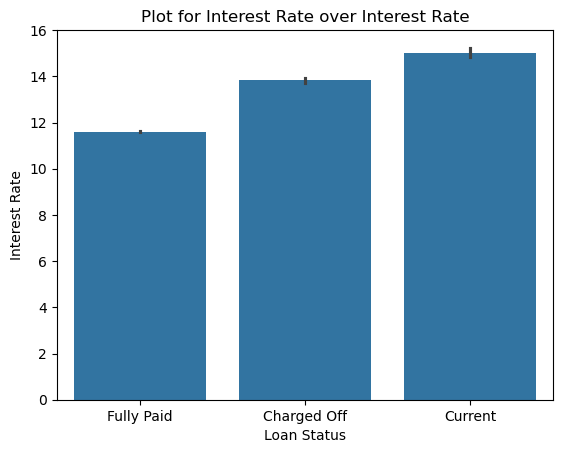

In [116]:
# Plotting Bar Plot
sns.barplot(df, x='loan_status', y='int_rate', estimator='mean')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Plot for Interest Rate over Interest Rate')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Loans with Lower Interest Rate are slightly more likely to be Fully Paid than that of Higher Interest Rate`

## 11. Last Payment Date

### Univariate Analysis

In [120]:
df['last_pymnt_d'].value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [121]:
# Converting Date values from String type to DateTime type
df['last_pymnt_d_datetime'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [122]:
# Finding values of Last payment Date having count more than 100
se_last_pymnt_d_val_cnt = df['last_pymnt_d_datetime'].value_counts()
se_last_pymnt_d_val_cnt_gt_100 = se_last_pymnt_d_val_cnt[se_last_pymnt_d_val_cnt.values > 100]

In [123]:
# Filtering rows based on Last payment Date having count more than 100
df_last_pymnt_d_cnt_gt_100 = df[df['last_pymnt_d_datetime'].isin(se_last_pymnt_d_val_cnt_gt_100.index)]

In [124]:
df_last_pymnt_d_cnt_gt_100.shape

(38877, 54)

### Bivariate analysis with 'loan_status'

In [126]:
# Finding Loan Default Percentage for each Last Payment Date
df_last_pymnt_d = round(df_last_pymnt_d_cnt_gt_100[df_last_pymnt_d_cnt_gt_100['loan_status'] == 'Charged Off']['last_pymnt_d_datetime'].value_counts()/df_last_pymnt_d_cnt_gt_100['last_pymnt_d_datetime'].value_counts()*100, 2)

In [127]:
# Replacing Null with zero
df_last_pymnt_d = df_last_pymnt_d.fillna(0)

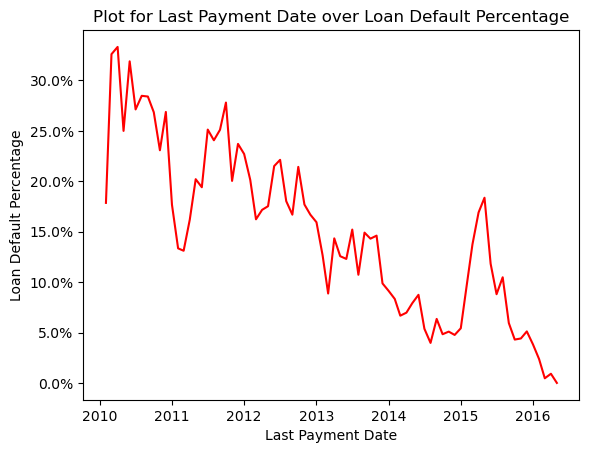

In [128]:
plt.plot(df_last_pymnt_d.index, df_last_pymnt_d.values, color='red')
plt.xlabel('Last Payment Date')
plt.ylabel('Loan Default Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Plot for Last Payment Date over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Loan applicant having Last Payment Date in more past will more likely to default than the one who made Payment in recent date`

## 12. Loan Amount

### Univariate Analysis

In [132]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

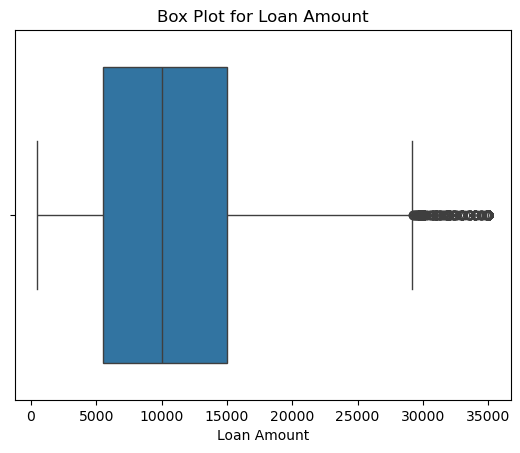

In [133]:
# Plotting Box Plot
sns.boxplot(x=df['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Box Plot for Loan Amount')
plt.show()

In [134]:
# Removing Outliers
df_cleaned = df[df['loan_amnt'] < 30000]

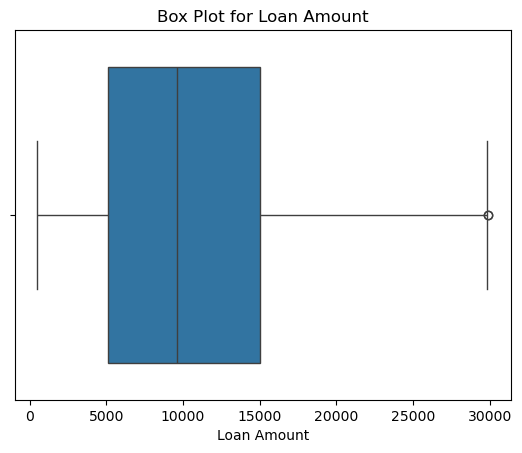

In [135]:
# Plotting Box Plot
sns.boxplot(x=df_cleaned['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Box Plot for Loan Amount')
plt.show()

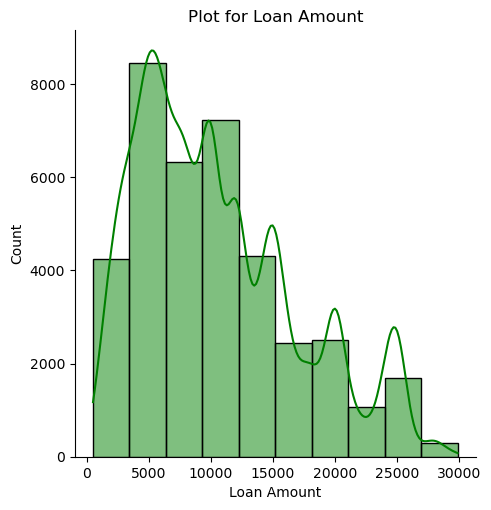

In [136]:
# Plotting Distribution Plot
sns.displot(x=df_cleaned['loan_amnt'], bins=10, kde=True, color='g')
plt.xlabel('Loan Amount')
plt.title('Plot for Loan Amount')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Loan Amounts are between 4000 to 15000

### Bivariate analysis with 'loan_status'

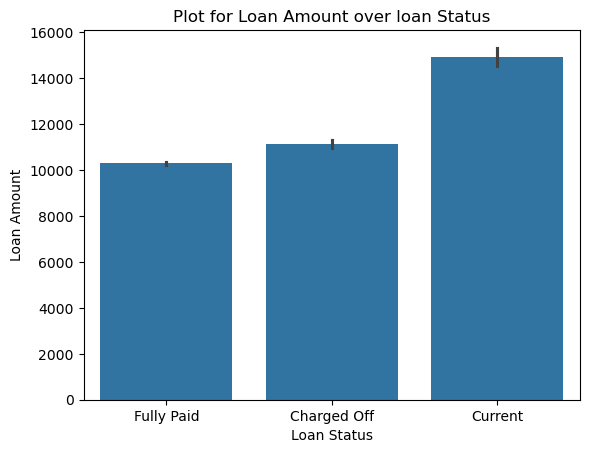

In [139]:
# Plotting Bar Plot
sns.barplot(df_cleaned, x='loan_status', y='loan_amnt', estimator='mean')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Plot for Loan Amount over loan Status')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Loan Amount does not have any impact on Loan Default`

## 13. Loan Purpose

### Univariate Analysis

In [143]:
df['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

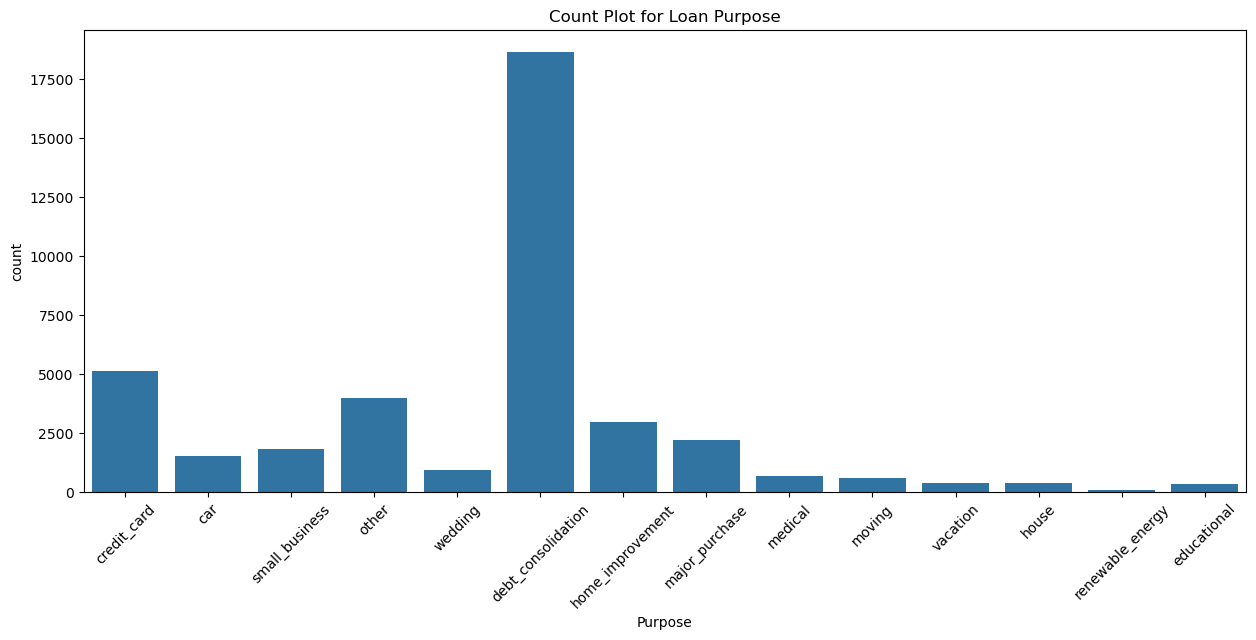

In [144]:
# Plotting Count Plot
plt.figure(figsize=(15, 6))
sns.countplot(x = df['purpose'])
plt.xlabel('Purpose')
plt.xticks(rotation=45)
plt.title('Count Plot for Loan Purpose')
plt.show()

<font color = red><b>Conclusion</b></font> - Most of Loans are given for 'Debt Consolidation'

### Bivariate analysis with 'loan_status'

In [147]:
# Finding Loan Default Percentage for each Loan Purpose
se_purpose = round(df[df['loan_status'] == 'Charged Off']['purpose'].value_counts()/df['purpose'].value_counts()*100, 2)

In [148]:
# Sorting values based on Loan Default Percentage
se_purpose.sort_values(ascending=False, inplace=True)

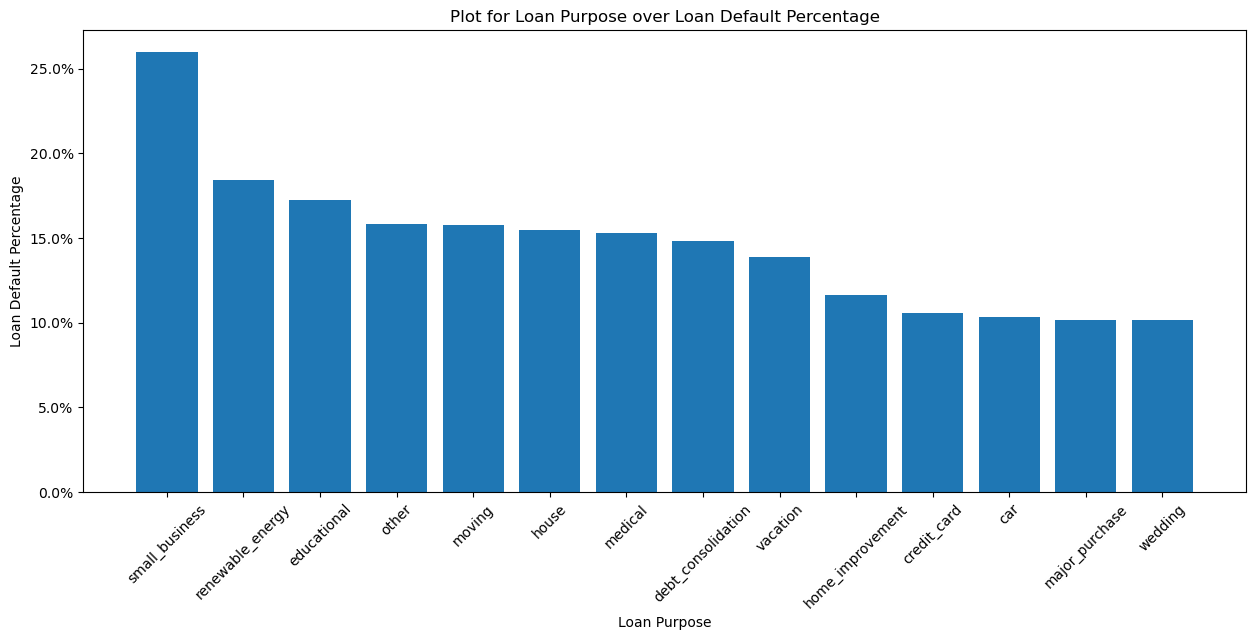

In [149]:
# Plotting Bar Plot
plt.figure(figsize=(15, 6))
plt.bar(se_purpose.index, se_purpose.values)
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.ylabel('Loan Default Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Plot for Loan Purpose over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Small Businesses are more likely to Default on Loans.`

## 14. Loan Term

### Univariate Analysis

In [153]:
df['term'].value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

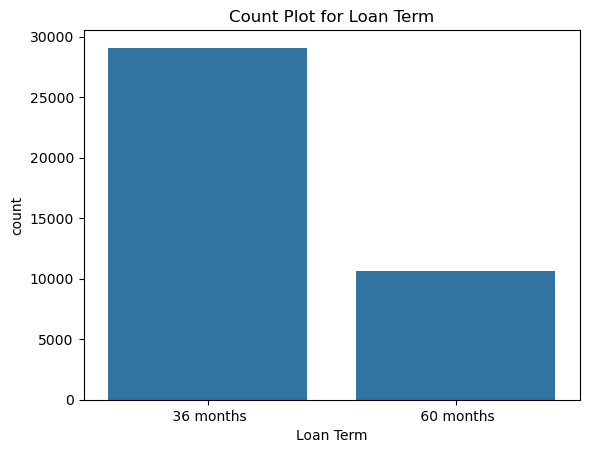

In [154]:
# Plotting Count Plot
sns.countplot(x = df['term'])
plt.xlabel('Loan Term')
plt.title('Count Plot for Loan Term')
plt.show()

<font color = red><b>Conclusion</b></font> - More Loans are having Loan Term as 36 months than that of 60 months

### Bivariate analysis with 'loan_status'

In [157]:
# Finding Loan Default Percentage for each Loan Term
se_term = round(df[df['loan_status'] == 'Charged Off']['term'].value_counts()/df['term'].value_counts()*100, 2)

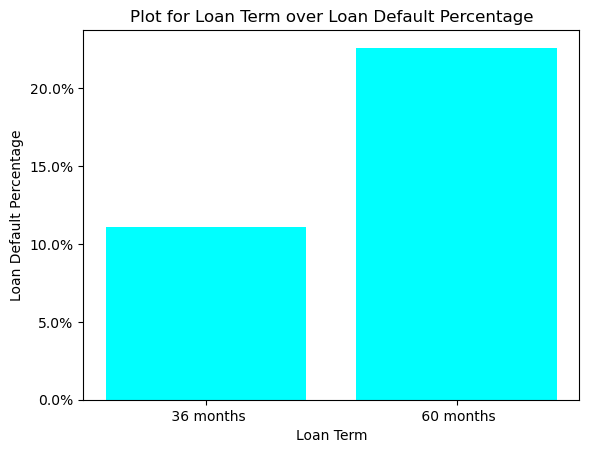

In [158]:
# Plotting Bar Plot
plt.bar(se_term.index, se_term.values, color='cyan')
plt.xlabel('Loan Term')
plt.ylabel('Loan Default Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Plot for Loan Term over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Applicant is more likely to default Long Term Loan than Short Term Loan`

## 15. Verification Status

### Univariate Analysis

In [162]:
df['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

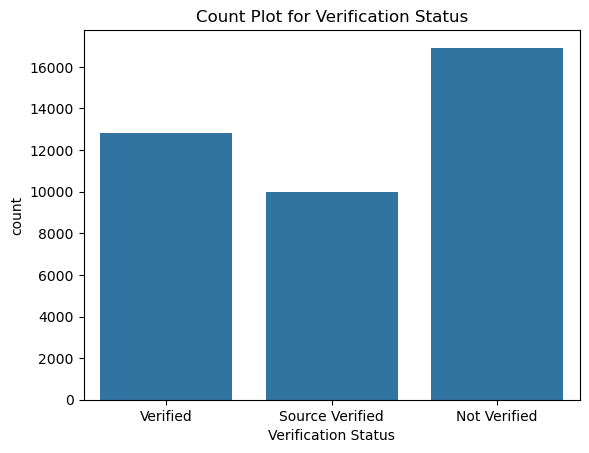

In [163]:
# Plotting Count Plot
sns.countplot(x = df['verification_status'])
plt.xlabel('Verification Status')
plt.title('Count Plot for Verification Status')
plt.show()

### Bivariate analysis with 'loan_status'

In [165]:
# Finding Loan Default Percentage for each Verification Status
se_verification_status = round(df[df['loan_status'] == 'Charged Off']['verification_status'].value_counts()/df['verification_status'].value_counts()*100, 2)

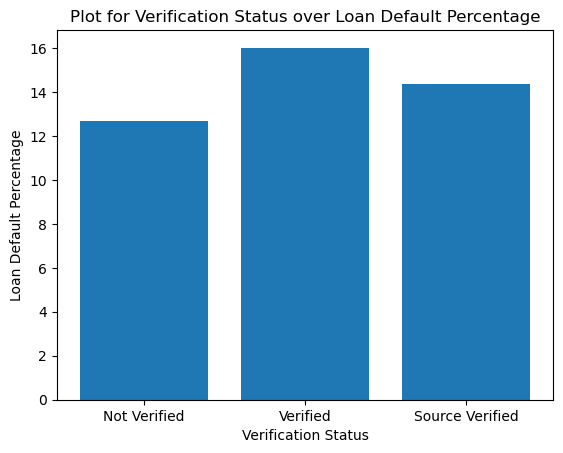

In [166]:
# Plotting Bar Plot
plt.bar(se_verification_status.index, se_verification_status.values)
plt.xlabel('Verification Status')
plt.ylabel('Loan Default Percentage')
plt.title('Plot for Verification Status over Loan Default Percentage')
plt.show()

#### <font color = red><b>Conclusion</b></font> - `Verification Status does not have any impact on Loan Default`

## Insights and Observations
- Higher interest rates correlate with higher default rates.
- Lower grades (e.g., C, D, E) show significantly higher proportions of defaults.
- Longer loan terms (60 months) have higher default rates compared to 36-month terms.
- Small Businesses are more likely to Default on Loans.
- Loan applicant having Last Payment Date in more past will more likely to default than the one who made Payment in recent date.
- Applicant having more Inquiries in past 6 months is slightly more likely to Default on Loan than those with lesser inquiries.

## Recommendations
- Focus on granting loans to applicants with higher grades (A, B).
- Increase interest rates for applicants with lower grades to mitigate risk.
- Limit loans with 60-month terms for high-risk applicants.
- Limit loans to Small Businesses.
- Give priority to Applicant who recently paid off his/her debt.
- Grant loans to Applicants having lesser inquiries over the ones having higher inquiries.